Upload ORIGINAL transaction screenshot (r.jpg):


Saving r.jpg to r.jpg

Upload FRAUD transaction screenshot (f.jpg):


Saving mhnhgm.jpg to mhnhgm.jpg
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Found 200 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.6205 - loss: 0.6664 - val_accuracy: 0.5000 - val_loss: 0.8264 - learning_rate: 1.0000e-05
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.5913 - loss: 0.6863 - val_accuracy: 0.5000 - val_loss: 0.8178 - learning_rate: 1.0000e-05
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.6602 - loss: 0.6022 - val_accuracy: 0.5000 - val_loss: 0.8073 - learning_rate: 1.0000e-05
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.6767 - loss: 0.5987 - val_accuracy: 0.5000 - val_loss: 0.7966 - learning_rate: 1.0000e-05
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.7988 - loss: 0.5038 - val_accuracy: 0.5000 - val_loss: 0.7882 - learning_rate: 1.0000e-05
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.7860 - loss: 0.4878 - val_accuracy: 0.5000 - val_loss: 0.7795 - learning_rate: 1.0000e-05
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.7903 - loss: 0.4672 - val_accuracy: 0.5000

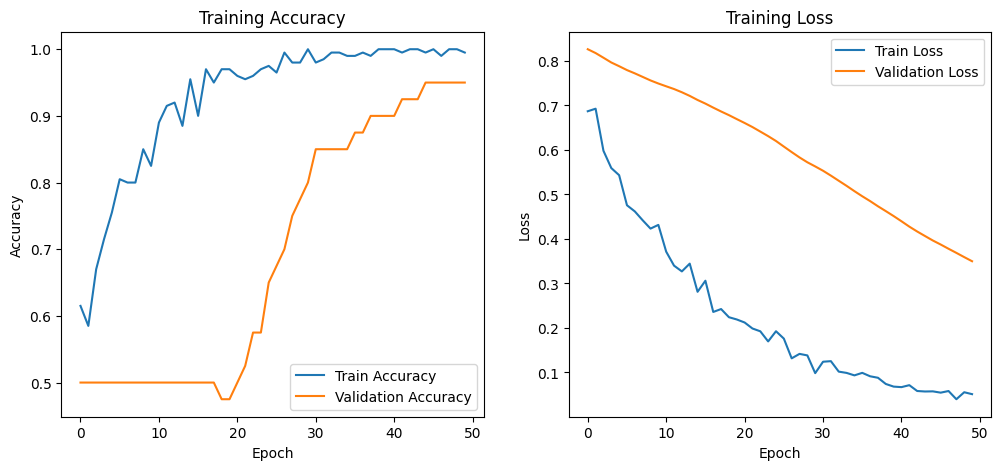


UPI Transaction Fraud Detection System

Choose an option:
1. Take Photo
2. Upload File
3. Exit
> 1
Click the CAPTURE button when ready...
Note: Ensure camera permissions are granted.


<IPython.core.display.Javascript object>


Choose an option:
1. Take Photo
2. Upload File
3. Exit
> 2
Note: Please upload images in JPG/PNG format.


Saving rty.jpg to rty.jpg


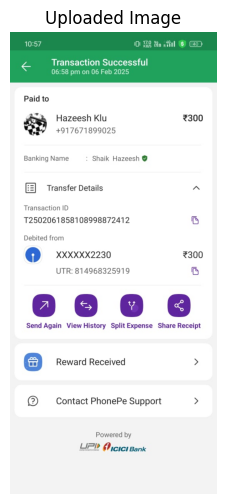

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 960ms/step


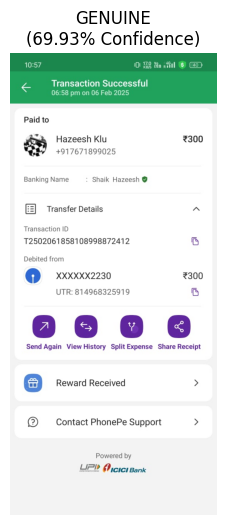


Choose an option:
1. Take Photo
2. Upload File
3. Exit
> 2
Note: Please upload images in JPG/PNG format.


Saving f.jpg to f.jpg


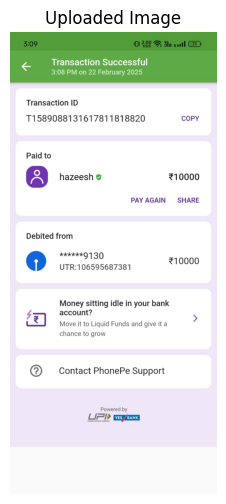

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 976ms/step


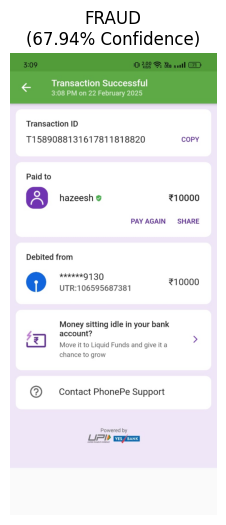


Choose an option:
1. Take Photo
2. Upload File
3. Exit
> 3
Exiting system...


In [1]:
# Install required packages
!pip install tensorflow opencv-python-headless numpy -q

# Import libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import numpy as np
import os
import shutil
import re
from google.colab import files
from IPython.display import display, Javascript, HTML
import matplotlib.pyplot as plt
import base64

# ----------------- Dataset Setup -----------------
# Create directories for train and validation splits
def setup_directories():
    shutil.rmtree('dataset', ignore_errors=True)
    os.makedirs('dataset/original', exist_ok=True)
    os.makedirs('dataset/fraud', exist_ok=True)
    os.makedirs('dataset/train/original', exist_ok=True)
    os.makedirs('dataset/train/fraud', exist_ok=True)
    os.makedirs('dataset/val/original', exist_ok=True)
    os.makedirs('dataset/val/fraud', exist_ok=True)

setup_directories()

def sanitize_filename(filename):
    return re.sub(r' \(\d+\)', '', filename)

print("Upload ORIGINAL transaction screenshot (r.jpg):")
original_img = files.upload()
print("\nUpload FRAUD transaction screenshot (f.jpg):")
fraud_img = files.upload()

for fn in original_img.keys():
    clean_fn = sanitize_filename(fn)
    dest = 'dataset/original/r.jpg' if 'r' in clean_fn.lower() else f'dataset/original/{clean_fn}'
    shutil.move(fn, dest)

for fn in fraud_img.keys():
    clean_fn = sanitize_filename(fn)
    dest = 'dataset/fraud/f.jpg' if 'f' in clean_fn.lower() else f'dataset/fraud/{clean_fn}'
    shutil.move(fn, dest)

# ----------------- Data Augmentation to Train and Val Directories -----------------
def augment_data():
    num_train = 100  # Number of training images per class
    num_val = 20    # Number of validation images per class

    # Define generator for augmentation
    aug_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    # Generate augmented images for 'original' class
    orig_gen_train = aug_datagen.flow_from_directory(
        'dataset',
        target_size=(224, 224),
        batch_size=1,
        class_mode='binary',
        classes=['original'],
        save_to_dir='dataset/train/original',
        save_prefix='aug',
        save_format='jpg',
        shuffle=True
    )
    for _ in range(num_train):
        next(orig_gen_train)

    orig_gen_val = aug_datagen.flow_from_directory(
        'dataset',
        target_size=(224, 224),
        batch_size=1,
        class_mode='binary',
        classes=['original'],
        save_to_dir='dataset/val/original',
        save_prefix='val',
        save_format='jpg',
        shuffle=True
    )
    for _ in range(num_val):
        next(orig_gen_val)

    # Generate augmented images for 'fraud' class
    fraud_gen_train = aug_datagen.flow_from_directory(
        'dataset',
        target_size=(224, 224),
        batch_size=1,
        class_mode='binary',
        classes=['fraud'],
        save_to_dir='dataset/train/fraud',
        save_prefix='aug',
        save_format='jpg',
        shuffle=True
    )
    for _ in range(num_train):
        next(fraud_gen_train)

    fraud_gen_val = aug_datagen.flow_from_directory(
        'dataset',
        target_size=(224, 224),
        batch_size=1,
        class_mode='binary',
        classes=['fraud'],
        save_to_dir='dataset/val/fraud',
        save_prefix='val',
        save_format='jpg',
        shuffle=True
    )
    for _ in range(num_val):
        next(fraud_gen_val)

augment_data()

# ----------------- Enhanced Model Definition with Fine-Tuning -----------------
def create_robust_model():
    base_model = tf.keras.applications.MobileNetV2(
        input_shape=(224, 224, 3),
        include_top=False,
        weights='imagenet'
    )
    # Unfreeze the base model for fine-tuning
    base_model.trainable = True
    # Freeze the first 100 layers
    for layer in base_model.layers[:100]:
        layer.trainable = False

    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

model = create_robust_model()

# ----------------- Training and Validation Generators -----------------
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'dataset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    'dataset/val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Add model checkpointing
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'best_model.keras',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max'
)

# Train the model
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[
        checkpoint,
        tf.keras.callbacks.EarlyStopping(
            patience=10,
            restore_best_weights=True
        ),
        tf.keras.callbacks.ReduceLROnPlateau(
            factor=0.2,
            patience=5
        )
    ]
)

# Plot training results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# ----------------- Working Camera Integration -----------------
def take_photo():
    display(Javascript('''
        async function capturePhoto() {
            const div = document.createElement('div');
            div.style.position = 'fixed';
            div.style.top = '0';
            div.style.left = '0';
            div.style.zIndex = '9999';

            const video = document.createElement('video');
            video.style.width = '300px';
            video.style.border = '2px solid white';

            const captureBtn = document.createElement('button');
            captureBtn.textContent = 'Capture';
            captureBtn.style.margin = '10px';

            div.appendChild(video);
            div.appendChild(captureBtn);
            document.body.appendChild(div);

            try {
                const stream = await navigator.mediaDevices.getUserMedia({video: true});
                video.srcObject = stream;
                await video.play();

                captureBtn.onclick = () => {
                    const canvas = document.createElement('canvas');
                    canvas.width = video.videoWidth;
                    canvas.height = video.videoHeight;
                    const context = canvas.getContext('2d');
                    context.drawImage(video, 0, 0);

                    const data = canvas.toDataURL('image/jpeg');
                    google.colab.kernel.invokeFunction(
                        'notebook.set_photo', [data], {});

                    stream.getTracks().forEach(track => track.stop());
                    div.remove();
                };

            } catch(error) {
                alert('Camera error: ' + error.message);
                div.remove();
            }
        }
        capturePhoto();
    '''))

def process_photo(data):
    try:
        # Decode base64 image
        header, encoded = data.split(",", 1)
        img_bytes = base64.b64decode(encoded)
        img_np = np.frombuffer(img_bytes, dtype=np.uint8)
        img = cv2.imdecode(img_np, cv2.IMREAD_COLOR)

        if img is None:
            raise ValueError("Failed to decode image")

        # Convert to RGB
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Display preview
        plt.figure(figsize=(6,6))
        plt.imshow(img_rgb)
        plt.title("Captured Image")
        plt.axis('off')
        plt.show()

        # Process image
        processed_img = cv2.resize(img_rgb, (224, 224))
        processed_img = processed_img.astype(np.float32) / 255.0

        # Make prediction
        model = tf.keras.models.load_model('best_model.keras')
        pred = model.predict(np.expand_dims(processed_img, axis=0))[0][0]
        result = "GENUINE" if pred > 0.5 else "FRAUD"
        confidence = pred*100 if result == "GENUINE" else (1-pred)*100

        # Show result
        plt.figure(figsize=(6,6))
        plt.imshow(img_rgb)
        plt.title(f"{result}\n({confidence:.2f}% Confidence)")
        plt.axis('off')
        plt.show()

    except Exception as e:
        print(f"Error: {str(e)}")

# Register callback
from google.colab import output
output.register_callback('notebook.set_photo', process_photo)

# ----------------- User Interface -----------------
def main():
    while True:
        choice = input("\nChoose an option:\n1. Take Photo\n2. Upload File\n3. Exit\n> ")

        if choice == '1':
            print("Click the CAPTURE button when ready...")
            print("Note: Ensure camera permissions are granted.")
            take_photo()

        elif choice == '2':
            try:
                print("Note: Please upload images in JPG/PNG format.")
                uploaded = files.upload()
                for filename in uploaded.keys():
                    img = cv2.imread(filename)
                    if img is None:
                        print(f"Failed to load image: {filename}")
                        continue

                    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

                    plt.figure(figsize=(6,6))
                    plt.imshow(img_rgb)
                    plt.title("Uploaded Image")
                    plt.axis('off')
                    plt.show()

                    processed_img = cv2.resize(img_rgb, (224, 224))
                    processed_img = processed_img.astype(np.float32) / 255.0

                    model = tf.keras.models.load_model('best_model.keras')
                    pred = model.predict(np.expand_dims(processed_img, axis=0))[0][0]
                    result = "GENUINE" if pred > 0.5 else "FRAUD"
                    confidence = pred*100 if result == "GENUINE" else (1-pred)*100

                    plt.figure(figsize=(6,6))
                    plt.imshow(img_rgb)
                    plt.title(f"{result}\n({confidence:.2f}% Confidence)")
                    plt.axis('off')
                    plt.show()

            except Exception as e:
                print(f"Error: {str(e)}")

        elif choice == '3':
            print("Exiting system...")
            break

        else:
            print("Invalid choice. Please enter 1, 2, or 3.")

# ----------------- Run Program -----------------
if __name__ == "__main__":
    print("\n" + "="*50)
    print("UPI Transaction Fraud Detection System")
    print("="*50)
    main()